<a href="https://colab.research.google.com/github/nastiakobeleva/projects/blob/main/hw2_FINAL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import numpy as np
import torch
import torchvision
from tqdm.auto import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import random

In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [ ]:
set_random_seed(117)

In [ ]:
device = "cuda:0"

### Подготовка данных

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=0 && unzip dataset.zip?dl=0 > /dev/null

In [ ]:
import torchvision.transforms as transforms

In [ ]:
train_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.48024774, 0.44807175, 0.3975489), (0.23022199, 0.2265033 , 0.2261711))])

val_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.48024774, 0.44807175, 0.3975489), (0.23022199, 0.2265033 , 0.2261711))])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)

три ячейки ниже нужны были для того, чтобы найти параметры для нормализации данных, но теперь мне лень их перезапускать

In [ ]:
#means = []
#vars = []
#for image, label in train_dataset:
 # means.append(image.mean(dim = (1,2)).numpy())
 # vars.append(image.std(dim = (1,2)).numpy())

In [ ]:
#np.mean(np.array(means), axis = 0)

array([0.48024774, 0.44807175, 0.3975489 ], dtype=float32)

In [ ]:
#np.mean(np.array(vars), axis = 0)

array([0.23022199, 0.2265033 , 0.2261711 ], dtype=float32)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

In [ ]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0", return_losses = True):
    model.train()
    true_classes = []
    all_losses = []
    all_preds = []
    for images, labels in tqdm(train_dataloader):
      optimizer.zero_grad()
      images, labels = images.to(device), labels.to(device)
      y_preds = model(images)
      loss = criterion(y_preds, labels)
      loss.backward()
      optimizer.step()
      with torch.no_grad():
        all_losses.append(loss.item())
        all_preds.extend(y_preds.to('cpu').numpy())
        true_classes.extend(labels.to('cpu').numpy())
        all_classes = np.argmax(all_preds, axis=-1)
    print("train loss ", np.mean(all_losses), '\n', 'train accuracy ', accuracy_score(all_classes, true_classes), sep = "")
    if return_losses:
      return all_losses, accuracy_score(all_classes, true_classes)

In [ ]:
def predict(model, val_dataloader, criterion, device="cuda:0"):
  model.eval()
  val_losses = []
  val_classes = []
  true_classes = []
  for images, labels in tqdm(val_dataloader):
      images, labels = images.to(device), labels.to(device)
      true_classes.extend(labels.to('cpu').numpy())
      y_preds = model(images)
      loss = criterion(y_preds, labels)
      val_losses.append(loss.item())
      y_classes = torch.argmax(y_preds, dim=-1)
      val_classes.extend(y_classes.to('cpu').numpy())
  print("val loss ", np.mean(val_losses), "\n", "val accuracy ", accuracy_score(val_classes, true_classes), sep = "")
  return val_losses, val_classes, true_classes

In [ ]:
def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None, return_metrics = True):
    all_losses = []
    all_acc = []
    val_losses = []
    val_acc = []
    for epoch in range(n_epochs):
      epoch_losses, epoch_accuracy = train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0", return_losses = True)
      all_losses.extend(epoch_losses)
      all_acc.append(epoch_accuracy)
      val_epoch_losses, val_classes, true_classes = predict(model, val_dataloader, criterion, device="cuda:0")
      val_losses.extend(val_epoch_losses)
      val_acc.append(accuracy_score(val_classes, true_classes))
    if return_metrics == True:
      return all_losses, all_acc, val_losses, val_acc

### Обучение модели, запуски экспериментов

**LeNet** (kinda)

In [ ]:
class LeNet(torch.nn.Module):
    def __init__(self, dropout=0.4):
        super(LeNet, self).__init__()

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (5,5)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = (2,2)))
        
        self.conv2 = nn.Sequential(
            torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (5,5)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = (2,2)))
        
        self.flatten = torch.nn.Flatten(),
        
        self.linear = torch.nn.Sequential(
            torch.nn.Linear(5408, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 512),
            torch.nn.Linear(512, 200))
  
        self.softmax = torch.nn.Softmax(dim = 1)
    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        
        return self.softmax(x)

In [ ]:
model = Model()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
n_epochs = 2

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.297321188449859
val accuracy 0.0049
tests passed


In [ ]:
dummy_trainset, dummy_testset = torch.utils.data.random_split(
    train_dataset, 
    [int(0.01 * len(train_dataset)), len(train_dataset) - int(0.01 * len(train_dataset))]
)

In [ ]:
dummy_dataloader = torch.utils.data.DataLoader(dummy_trainset, batch_size=256, shuffle=True)

In [ ]:
model = LeNet()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10

In [ ]:
all_losses, all_acc, val_losses, val_acc = train(model, dummy_dataloader, val_dataloader, criterion, optimizer, n_epochs=n_epochs, scheduler=None, return_metrics = True)

  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.30026113986969
train accuracy 0.003


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.301615762710571
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.2986674308776855
train accuracy 0.008


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.300160801410675
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.296014428138733
train accuracy 0.008


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.29818149805069
val accuracy 0.0059


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.29728639125824
train accuracy 0.013


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.298205626010895
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.295476675033569
train accuracy 0.01


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.301084148883819
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.29427969455719
train accuracy 0.01


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.298092365264893
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.289997339248657
train accuracy 0.01


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.297942268848419
val accuracy 0.0067


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.288271188735962
train accuracy 0.019


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.297666835784912
val accuracy 0.0078


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.282786250114441
train accuracy 0.025


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.296466302871704
val accuracy 0.0078


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.280657172203064
train accuracy 0.026


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.299066019058228
val accuracy 0.0061


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import figure

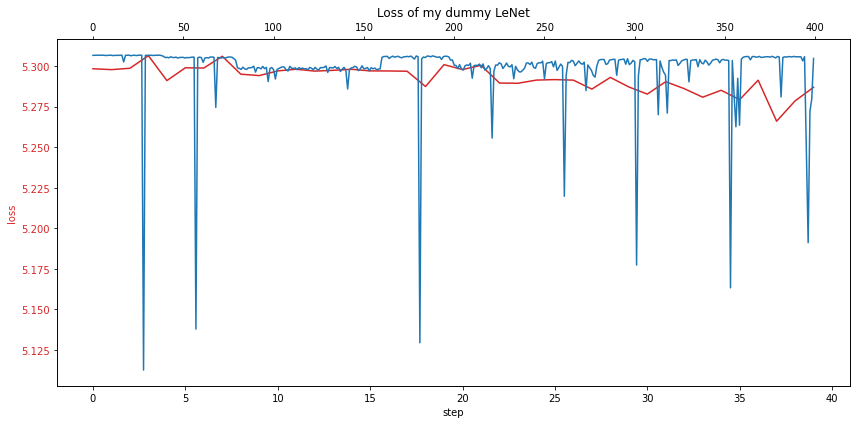

In [ ]:
fig, trainplt = plt.subplots()
fig.set_size_inches(12, 6)
plt.title('Loss of my dummy LeNet')

color = 'tab:red'
trainplt.set_xlabel('step')
trainplt.set_ylabel('loss', color=color)
trainplt.plot(all_losses, color=color)
trainplt.tick_params(axis='y', labelcolor=color)

test = trainplt.twiny()

color = 'tab:blue'
test.plot(val_losses, color=color)
test.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()

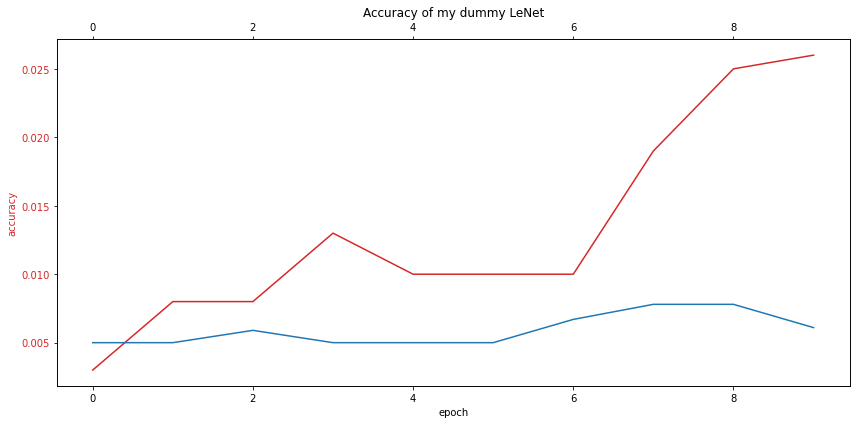

In [ ]:
fig, trainplt = plt.subplots()
fig.set_size_inches(12, 6)
plt.title('Accuracy of my dummy LeNet')

color = 'tab:red'
trainplt.set_xlabel('epoch')
trainplt.set_ylabel('accuracy', color=color)
trainplt.plot(all_acc, color=color)
trainplt.tick_params(axis='y', labelcolor=color)

test = trainplt.twiny()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
test.plot(val_acc, color=color)
test.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

**VGG Blocks**

In [ ]:
class VGG(torch.nn.Module):
    def __init__(self, dropout=0.4):
        super(VGG, self).__init__()

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (3,3)),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (3,3)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = (2,2)))
        
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = (3,3)),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = (3,3)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = (2,2)))
        
        self.flatten = torch.nn.Flatten(),
        
        self.linear = torch.nn.Sequential(
            torch.nn.Linear(5408, 2048),
            torch.nn.ReLU(),
            torch.nn.Linear(2048, 1024))
        self.output = torch.nn.Linear(1024, 200)
  
    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        
        return self.output(x)

In [ ]:
model = VGG()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10


In [ ]:
all_losses, all_acc, val_losses, val_acc = train(model, dummy_dataloader, val_dataloader, criterion, optimizer, n_epochs=n_epochs, scheduler=None, return_metrics = True)

  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.3047856092453
train accuracy 0.008


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.3014575123786924
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.258483290672302
train accuracy 0.014


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.395987641811371
val accuracy 0.0056


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.174147725105286
train accuracy 0.012


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.34452987909317
val accuracy 0.0093


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.060702085494995
train accuracy 0.016


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.25478413105011
val accuracy 0.0099


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.965421438217163
train accuracy 0.024


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.4156682133674625
val accuracy 0.0091


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.821410536766052
train accuracy 0.038


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.389889895915985
val accuracy 0.0188


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.644726276397705
train accuracy 0.053


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.337000942230224
val accuracy 0.0169


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.412023425102234
train accuracy 0.078


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.594182634353638
val accuracy 0.0219


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.016838073730469
train accuracy 0.133


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.736288118362427
val accuracy 0.0251


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 3.659744381904602
train accuracy 0.181


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 6.057305085659027
val accuracy 0.0206


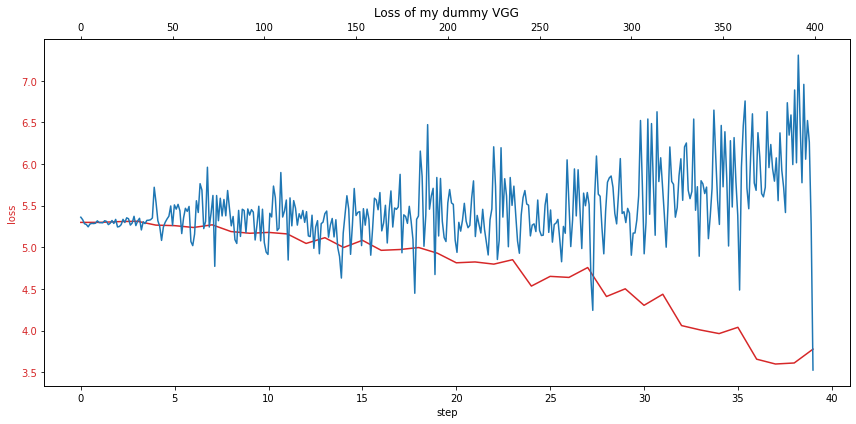

In [ ]:
fig, trainplt = plt.subplots()
fig.set_size_inches(12, 6)
plt.title('Loss of my dummy VGG')

color = 'tab:red'
trainplt.set_xlabel('step')
trainplt.set_ylabel('loss', color=color)
trainplt.plot(all_losses, color=color)
trainplt.tick_params(axis='y', labelcolor=color)

test = trainplt.twiny()

color = 'tab:blue'
test.plot(val_losses, color=color)
test.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()

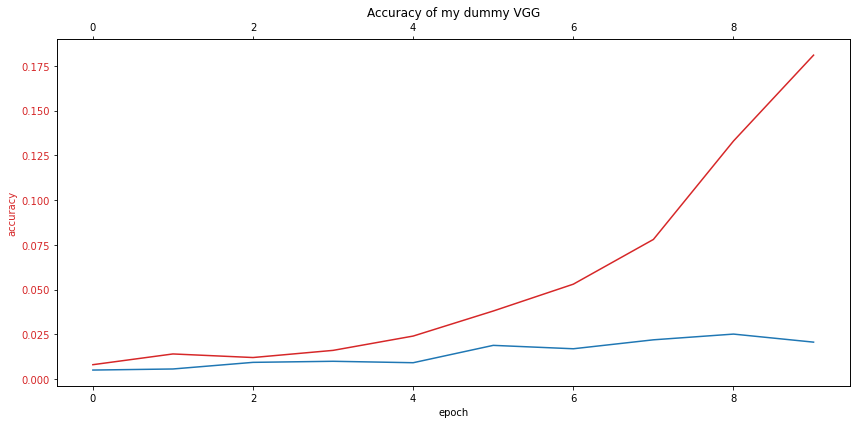

In [ ]:
fig, trainplt = plt.subplots()
fig.set_size_inches(12, 6)
plt.title('Accuracy of my dummy VGG')

color = 'tab:red'
trainplt.set_xlabel('epoch')
trainplt.set_ylabel('accuracy', color=color)
trainplt.plot(all_acc, color=color)
trainplt.tick_params(axis='y', labelcolor=color)

test = trainplt.twiny()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
test.plot(val_acc, color=color)
test.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Ну вот уже как-то получше... Хотя бы на трейне accuracy нормально растет

**ResNet**


Код для реализации ResNet взят отсюда:
```
(https://www.kaggle.com/poonaml/building-resnet34-from-scratch-using-pytorch)
```
Сама я, конечно, не знаю, как реализовать это чудо.

In [ ]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(0.5)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1,
                     padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

In [ ]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=200):
        super().__init__()
        
        self.inplanes = 64

        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 , num_classes)


    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None  
   
        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, 1, stride, bias=False),
                nn.BatchNorm2d(planes),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        
        self.inplanes = planes
        
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        x = self.conv1(x)           # 224x224
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)         # 112x112

        x = self.layer1(x)          # 56x56
        x = self.layer2(x)          # 28x28
        x = self.layer3(x)          # 14x14
        x = self.layer4(x)          # 7x7

        x = self.avgpool(x)         # 1x1
        x = torch.flatten(x, 1)     # remove 1 X 1 grid and make vector of tensor shape 
        x = self.fc(x)

        return x

In [ ]:
def resnet34():
    layers=[3, 4, 6, 3]
    model = ResNet(BasicBlock, layers)
    return model

In [ ]:
model=resnet34()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10

In [ ]:
all_losses, all_acc, val_losses, val_acc = train(model, dummy_dataloader, val_dataloader, criterion, optimizer, n_epochs=n_epochs, scheduler=None, return_metrics = True)

  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.656237721443176
train accuracy 0.006


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.333341979980469
val accuracy 0.0052


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.313215255737305
train accuracy 0.009


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.956615471839905
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.172539114952087
train accuracy 0.015


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 6.022136545181274
val accuracy 0.005


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 5.002719163894653
train accuracy 0.033


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.65914603471756
val accuracy 0.0052


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.784366726875305
train accuracy 0.062


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.457104563713074
val accuracy 0.0069


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.519625902175903
train accuracy 0.101


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.318232607841492
val accuracy 0.0151


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 4.145325779914856
train accuracy 0.187


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.3301954627037045
val accuracy 0.0144


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 3.7438613176345825
train accuracy 0.291


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.4079710125923155
val accuracy 0.014


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 3.2452266216278076
train accuracy 0.422


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.506059229373932
val accuracy 0.0148


  0%|          | 0/4 [00:00<?, ?it/s]

train loss 2.5767629146575928
train accuracy 0.603


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.660080373287201
val accuracy 0.0121


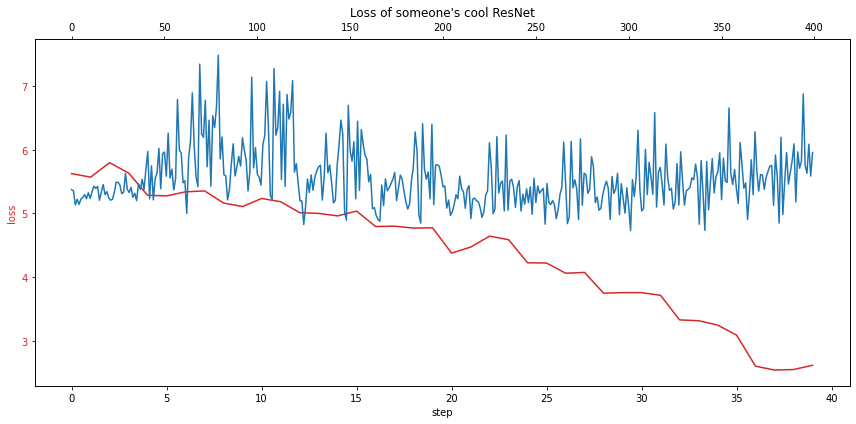

In [ ]:
fig, trainplt = plt.subplots()
fig.set_size_inches(12, 6)
plt.title("Loss of someone's cool ResNet")

color = 'tab:red'
trainplt.set_xlabel('step')
trainplt.set_ylabel('loss', color=color)
trainplt.plot(all_losses, color=color)
trainplt.tick_params(axis='y', labelcolor=color)

test = trainplt.twiny()

color = 'tab:blue'
test.plot(val_losses, color=color)
test.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

plt.show()

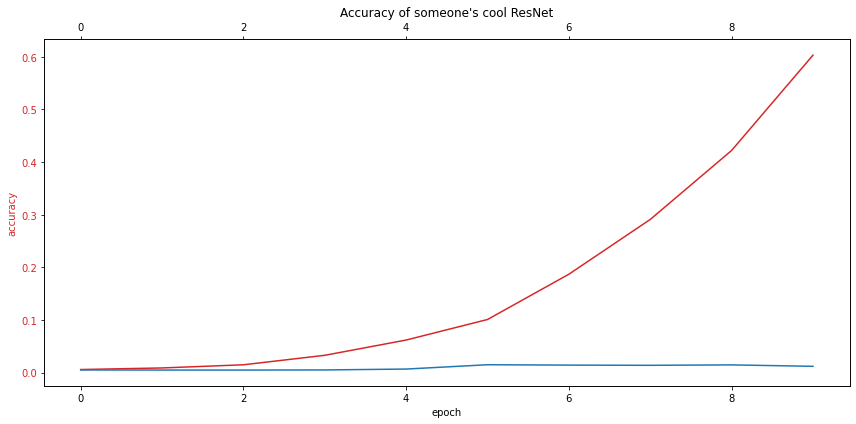

In [ ]:
fig, trainplt = plt.subplots()
fig.set_size_inches(12, 6)
plt.title("Accuracy of someone's cool ResNet")

color = 'tab:red'
trainplt.set_xlabel('epoch')
trainplt.set_ylabel('accuracy', color=color)
trainplt.plot(all_acc, color=color)
trainplt.tick_params(axis='y', labelcolor=color)

test = trainplt.twiny()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
test.plot(val_acc, color=color)
test.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Ну что сказать - я впечатлена. Вот этот прикол с добавлением остатков видимо реально работает. Про валидаюцию говорить сложно, все-таки мы обучались на 1/100 от датасета, но переобучается модель отлично

Если честно, сейчас три часа ночи, а я хочу к утру закончить домашку, поэтому давайте не будем мучаться, выберем архитектуру ResNet и не будем пытаться в фэнси инсепшоны. 

Теперь попробуем подобрать всякие аугментации и гИпЕрПаРаМеТрЫ

In [ ]:
train_transform = transforms.Compose(
    [transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize((0.48024774, 0.44807175, 0.3975489), (0.23022199, 0.2265033 , 0.2261711))])

val_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.48024774, 0.44807175, 0.3975489), (0.23022199, 0.2265033 , 0.2261711))])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False)

Так как тут я хочу хотя бы примерно понимать, что же все-таки происходит с тестом, увеличу размер своего dummy датасета

In [ ]:
dummy_trainset, dummy_testset = torch.utils.data.random_split(
    train_dataset, 
    [int(0.3 * len(train_dataset)), len(train_dataset) - int(0.3 * len(train_dataset))]
)
dummy_dataloader = torch.utils.data.DataLoader(dummy_trainset, batch_size=256, shuffle=True)

In [ ]:
all_losses, all_acc, val_losses, val_acc = train(model, dummy_dataloader, val_dataloader, criterion, optimizer, n_epochs=n_epochs, scheduler=None, return_metrics = True)

  0%|          | 0/118 [00:00<?, ?it/s]

train loss 5.332517680475267
train accuracy 0.0081


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.072646141052246
val accuracy 0.0166


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 5.091889547089399
train accuracy 0.019766666666666665


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.034007835388183
val accuracy 0.0178


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 4.908955505338766
train accuracy 0.0305


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.82612082362175
val accuracy 0.0327


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 4.694563594915099
train accuracy 0.045233333333333334


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.537678605318069
val accuracy 0.053


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 4.504938331700988
train accuracy 0.066


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.573337477445603
val accuracy 0.0678


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 4.3522498688455356
train accuracy 0.0813


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.204235380887985
val accuracy 0.0972


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 4.177737866417837
train accuracy 0.1063


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.0055882096290585
val accuracy 0.1181


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 4.03867595882739
train accuracy 0.1262


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 3.938006967306137
val accuracy 0.1302


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 3.8976405677148853
train accuracy 0.14596666666666666


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.116485595703125
val accuracy 0.1176


  0%|          | 0/118 [00:00<?, ?it/s]

train loss 3.754438079009622
train accuracy 0.16713333333333333


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 3.7235008507966993
val accuracy 0.1691


Text(0, 0.5, 'accuracy')

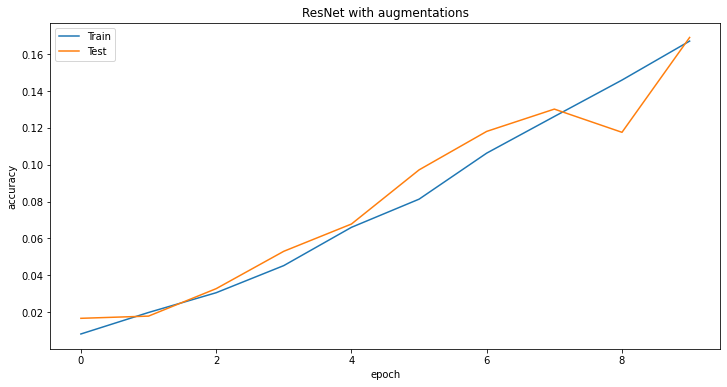

In [ ]:
epochs = [i for i in range(10)]

plt.figure(figsize=(12, 6))
plt.title("ResNet with augmentations")
plt.plot(epochs, all_acc, label = "Train")
plt.plot(epochs, val_acc, label = "Test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [ ]:
train_transform_without_aug = transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Normalize((0.48024774, 0.44807175, 0.3975489), (0.23022199, 0.2265033 , 0.2261711))])

train_dataset_without_aug = torchvision.datasets.ImageFolder("./dataset/dataset/train", transform=train_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)

In [ ]:
dummy_trainset_without_aug, dummy_testset = torch.utils.data.random_split(
    train_dataset, 
    [int(0.3 * len(train_dataset)), len(train_dataset) - int(0.3 * len(train_dataset))]
)
dummy_dataloader_without_aug = torch.utils.data.DataLoader(dummy_trainset_without_aug, batch_size=256, shuffle=True)

In [ ]:
# в этой ячейке модель обучалась на данные без аугментации, но accuracy на протяжении 
# нескольких эпох не поднималась выше 0,05, и мне стало лень ждать

**Размер батча и learning rate**

Я пробовала батчи 64

In [ ]:
del model_64

In [ ]:
model_128=resnet34()
model_128.to(device)

In [ ]:
dummy_dataloader128 = torch.utils.data.DataLoader(dummy_trainset, batch_size=128, shuffle=True)

In [ ]:
optimizer128 = torch.optim.Adam(model_128.parameters(), lr=0.001)

In [ ]:
all_losses128, all_acc128, val_losses128, val_acc128 = train(model_128, dummy_dataloader128, val_dataloader, criterion, optimizer128, n_epochs=10, scheduler=None, return_metrics = True)

  0%|          | 0/235 [00:00<?, ?it/s]

train loss 5.333735403101495
train accuracy 0.009733333333333333


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.200900042057038
val accuracy 0.0119


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 5.098546967607863
train accuracy 0.0181


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 5.051971215009689
val accuracy 0.0172


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 4.889289515069191
train accuracy 0.029433333333333332


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.738730001449585
val accuracy 0.0398


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 4.671833807356814
train accuracy 0.05026666666666667


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.53567932844162
val accuracy 0.0597


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 4.463524430863401
train accuracy 0.0715


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.231908941268921
val accuracy 0.0829


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 4.2695781859945745
train accuracy 0.09533333333333334


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.003782236576081
val accuracy 0.1218


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 4.093260189827452
train accuracy 0.11836666666666666


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 4.004466432332992
val accuracy 0.1257


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 3.9419423975843064
train accuracy 0.14046666666666666


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 3.8046375930309297
val accuracy 0.149


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 3.788271958777245
train accuracy 0.16213333333333332


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 3.754139298200607
val accuracy 0.1653


  0%|          | 0/235 [00:00<?, ?it/s]

train loss 3.6356031103337063
train accuracy 0.18586666666666668


  0%|          | 0/40 [00:00<?, ?it/s]

val loss 3.6270997524261475
val accuracy 0.1841


Запустить обучение можно в ячейке ниже.

In [ ]:
model=resnet34()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 50

In [ ]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler=None)

  0%|          | 0/782 [00:00<?, ?it/s]

train loss 4.666498676895181
train accuracy 0.05261


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 4.3337185081047345
val accuracy 0.088


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.783761413810808
train accuracy 0.15881


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.519704936425897
val accuracy 0.2046


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.2587556960942496
train accuracy 0.24871


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.252551374556143
val accuracy 0.2523


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.8894930596241863
train accuracy 0.31617


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.1008044828342487
val accuracy 0.2871


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.5555216881930067
train accuracy 0.37821


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.9057627388193636
val accuracy 0.3282


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.214880797259338
train accuracy 0.44851


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.9206315746790246
val accuracy 0.332


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.8362054029084227
train accuracy 0.52682


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.8338380327707604
val accuracy 0.3494


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.3985850910853852
train accuracy 0.62486


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.058288017405739
val accuracy 0.3468


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 0.9220899246690218
train accuracy 0.74016


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.4471427307853215
val accuracy 0.3324


  0%|          | 0/782 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
model_dropout=resnet34()
model_dropout.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_dropout.parameters(), lr=0.001)
n_epochs = 30

In [ ]:
train(model_dropout, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs)

  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.6875404284128446
train accuracy 0.17614


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.429481225677683
val accuracy 0.22


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.242623776426096
train accuracy 0.25231


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.19028510926645
val accuracy 0.2685


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.932709277133503
train accuracy 0.30948


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.026597045644929
val accuracy 0.2951


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.671577994780772
train accuracy 0.35865


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.996754549726655
val accuracy 0.3241


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.4109819202166993
train accuracy 0.41131


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.809064987339551
val accuracy 0.3602


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.152937650680542
train accuracy 0.46094


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.7799352150929124
val accuracy 0.3638


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.8926522667755556
train accuracy 0.51569


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.0171779831753502
val accuracy 0.3615


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.617778977469715
train accuracy 0.57503


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.8853404371044302
val accuracy 0.3591


  0%|          | 0/782 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
model_dropout2=resnet34()
model_dropout2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_dropout2.parameters(), lr=0.001)
n_epochs = 30

In [ ]:
train(model_dropout2, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs)

  0%|          | 0/782 [00:00<?, ?it/s]

train loss 4.890175357803969
train accuracy 0.03272


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 4.3744691987580895
val accuracy 0.0785


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.9326992964805543
train accuracy 0.13784


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.7873781421516517
val accuracy 0.1768


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.4487130047415224
train accuracy 0.21764


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.347615625284895
val accuracy 0.2466


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 3.151502942795034
train accuracy 0.27018


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.149302274365968
val accuracy 0.2795


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.924361378945353
train accuracy 0.31143


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.105752187439158
val accuracy 0.2996


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.7227604154430693
train accuracy 0.34842


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.8913287633582008
val accuracy 0.327


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.538183590792634
train accuracy 0.38406


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.938729600061344
val accuracy 0.3411


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.3628179276995644
train accuracy 0.41914


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.9051776535903353
val accuracy 0.3422


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.188083366055013
train accuracy 0.45277


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.9227222113669673
val accuracy 0.3588


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 2.0045370743097854
train accuracy 0.49177


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.827426011049295
val accuracy 0.3666


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.8419352163134328
train accuracy 0.52506


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.057895203179951
val accuracy 0.3667


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.6769307577396597
train accuracy 0.56008


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 2.921191758747342
val accuracy 0.37


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.490520463498962
train accuracy 0.60033


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.3664662174031705
val accuracy 0.3729


  0%|          | 0/782 [00:00<?, ?it/s]

train loss 1.3492015273979558
train accuracy 0.63315


  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.109932034830504
val accuracy 0.3682


  0%|          | 0/782 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model_dropout2, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(10, 10 * accuracy / 0.44)))

  0%|          | 0/79 [00:00<?, ?it/s]

val loss 3.08934926383103
val accuracy 0.3704
Оценка за это задание составит 8.418181818181818 баллов


### Отчёт об экспериментах 

текст писать тут